# Setup

In [1]:
import torch

from utils.generate_input_from_data_directory import generate_input_from_data_directory
from utils.generate_input_from_tensors import generate_input_from_tensors
from utils.predict_layout import predict_layout
from utils.processing_the_output_data_from_layoutdm import combine_elements_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json
#from utils.print_attrs import print_attrs

/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/maciejkozubal/minic

# Compare input generation methods

## 1. generate from tensors (user passed of default)


In [2]:
custom_input_from_tensor_default = generate_input_from_tensors(verbatim=True)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



In [3]:
custom_input_from_tensor = generate_input_from_tensors(
    bboxes_tensor = torch.FloatTensor([
        [0.5, 0.5, 0.1, 0.6],
        [0.5, 0.5, 0.6, 0.1],
        [0.5, 0.5, 0.2, 0.2],
        [0.5, 0.5, 0.4, 0.4],
        [0.8, 0.8, 0.1, 0.1],
        [0.2, 0.2, 0.1, 0.1]
    ]),
    labels_tensor = torch.LongTensor([0, 1, 6, 4, 0, 0]),
    verbatim=True
)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



## 2. generate based on files from data directory

In [4]:
custom_input_from_data_directory, list_files = generate_input_from_data_directory(verbatim=True)

bboxes:
tensor([[0.5000, 0.5000, 0.8533, 0.8533],
        [0.5000, 0.5000, 0.6667, 0.5542],
        [0.5000, 0.5000, 0.9942, 0.5550],
        [0.5000, 0.5000, 0.4167, 0.4167],
        [0.5000, 0.5000, 0.4817, 0.0417],
        [0.5000, 0.5000, 0.6450, 0.0225],
        [0.5000, 0.5000, 0.4267, 0.0225]])
labels: tensor([6, 1, 1, 1, 0, 0, 0])



# Comaparison of models 

## 1. Trained on Rico dataset (default)
`model_name = layoutdm_publaynet`

### 1.1. Condition type 'c'
C -> S+P (reposition and resize)

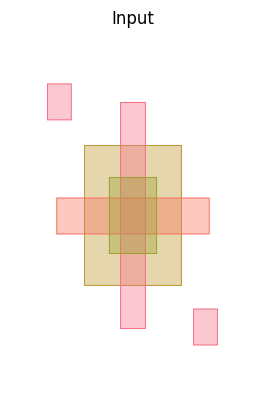

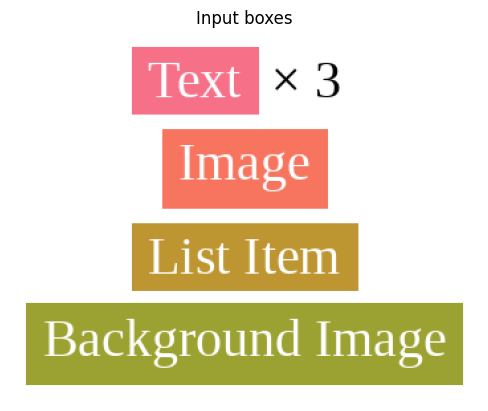

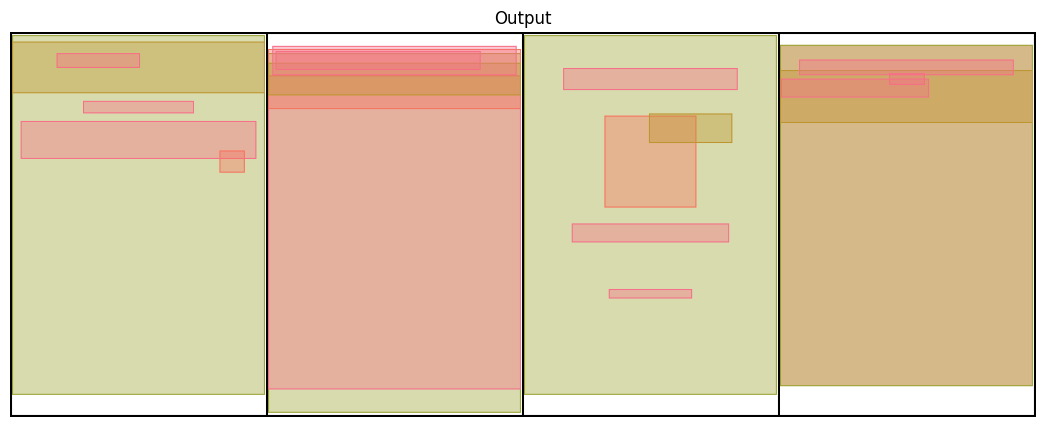

In [5]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='c', plot_images=True, print_output=False)

### 1.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

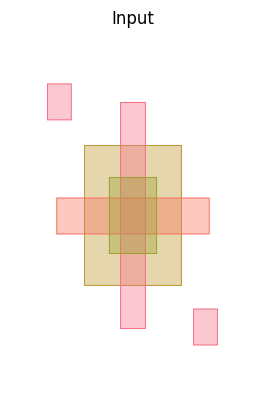

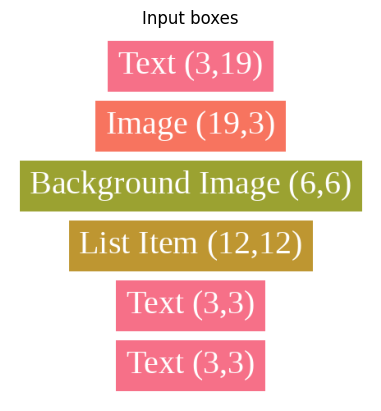

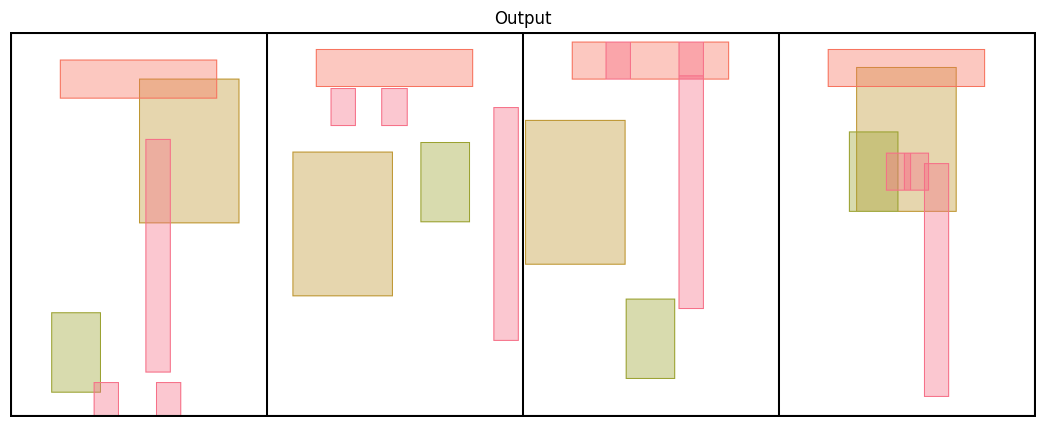

In [6]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='cwh', plot_images=True, print_output=False)

## 2. Trained on PubLayNet dataset
`model_name = layoutdm_publaynet`

### 2.1. Condition type 'c'
C -> S+P (reposition and resize)

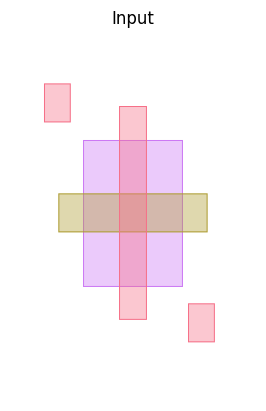

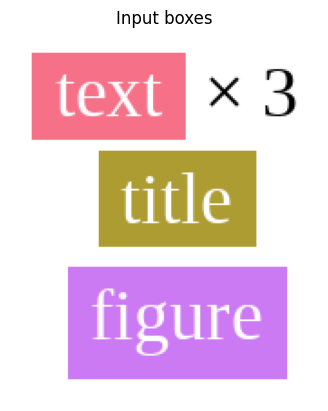

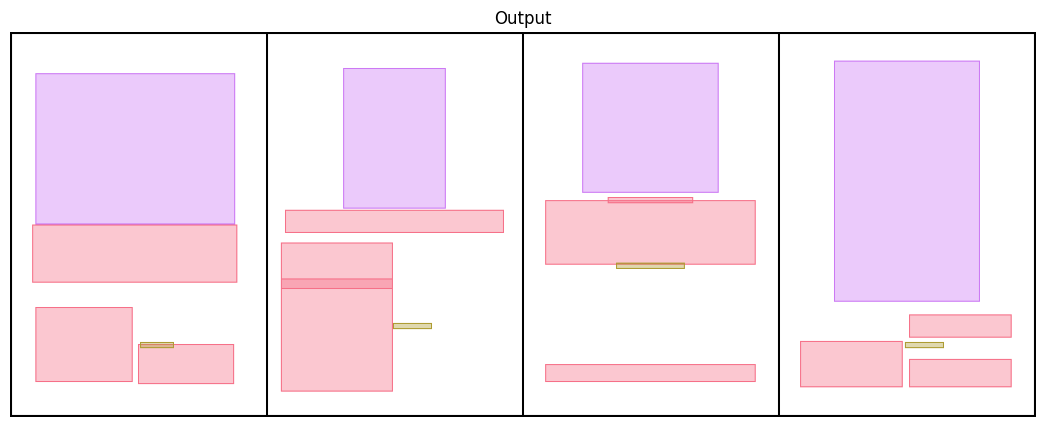

In [7]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='c', plot_images=True, print_output=False)

### 2.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

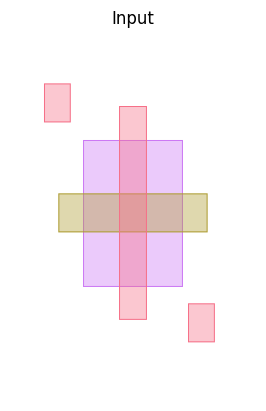

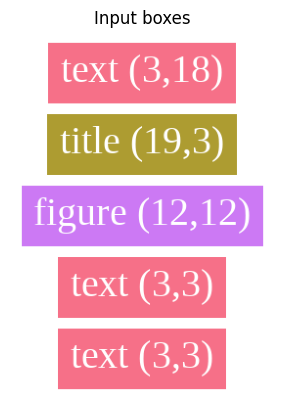

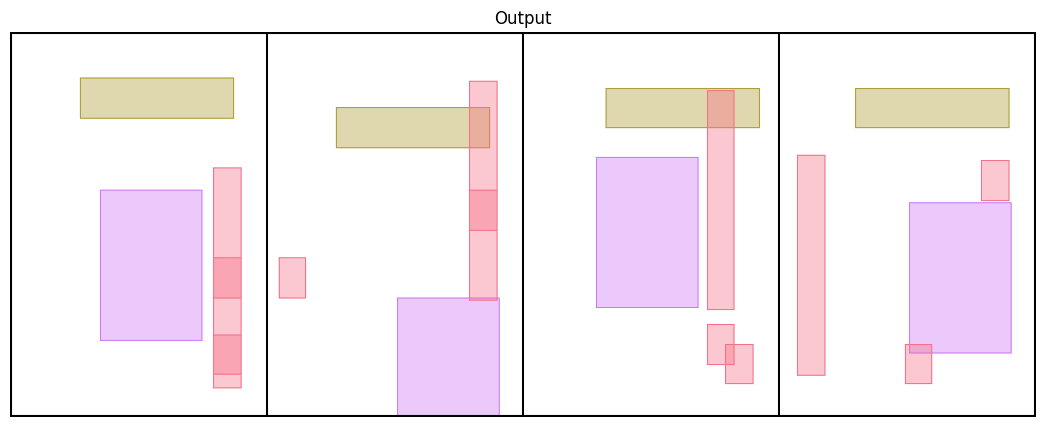

In [8]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='cwh', plot_images=True, print_output=False)

# Recommened approach

Recommendations:
- model:            Rico
- condition typ:    cwh ("C+S -> P": reposition without resizing)
    
Optional:
- W_CANVAS
- n_samples (default: 4)

## input
generate input tensors from objects in /data/

In [2]:
custom_input, list_files = generate_input_from_data_directory(verbatim=True)

bboxes:
tensor([[0.5000, 0.5000, 4.5600, 3.0400],
        [0.5000, 0.5000, 0.6667, 0.5542],
        [0.5000, 0.5000, 0.4692, 0.0383],
        [0.5000, 0.5000, 0.5175, 0.0225],
        [0.5000, 0.5000, 0.6175, 0.0167]])
labels: tensor([6, 1, 0, 0, 0])



## output
predict layouts using layoutdm for objects in /data/

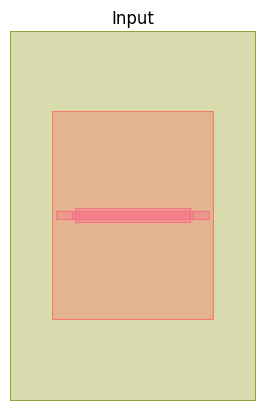

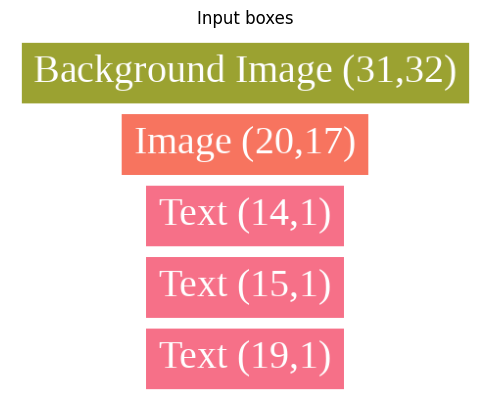

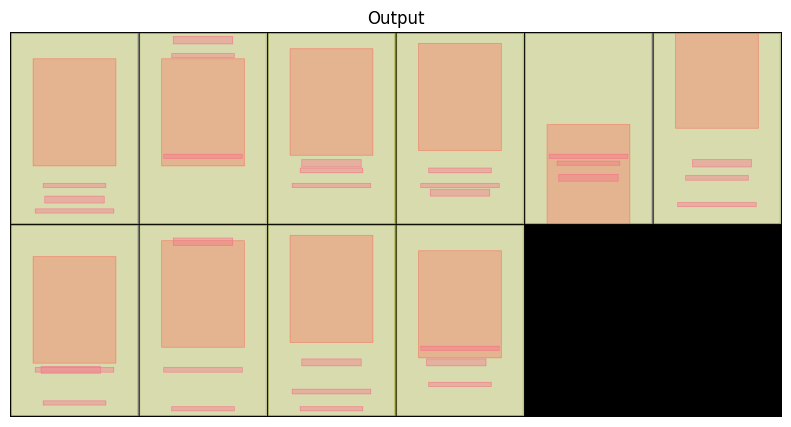

In [3]:
pred = predict_layout(custom_input,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      plot_images=True,
                      print_output=False,
                      n_samples=10)

## save
the predicted layouts from layoudm in a json format

In [4]:
output = save_pred_to_json(list_files, pred, verbatim=False)

## combine 
combine the input elements into the output png file, based on the layoutdm predicted layouts

In [5]:
combine_elements_based_on_layout_dm(output)

# tests


/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/maciejkozubal/minic

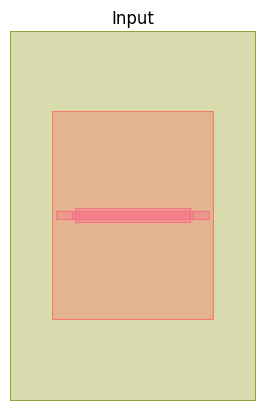

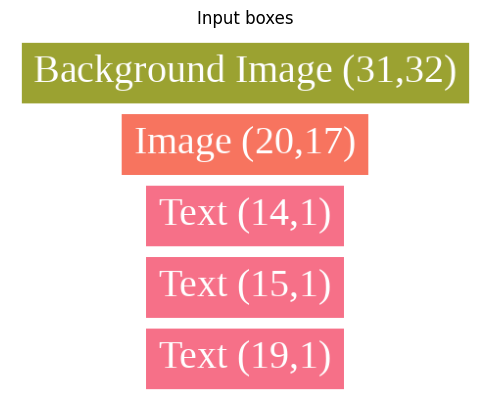

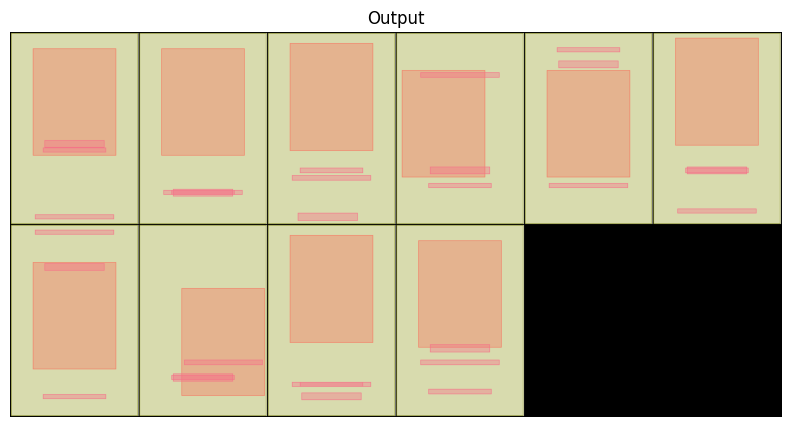

Page 0
Input: {'test_background.png': (600, 600, 1199, 1200), 'test_logo.png': (600, 435, 783, 673), 'test_header.header': (600, 699, 562, 45), 'test2.txt': (600, 737, 597, 28), 'test1.txt': (600, 1159, 739, 28)}
Combined image saved to: /home/maciejkozubal/layout-dm/output/output_suggestion-0.png


Page 1
Input: {'test_background.png': (600, 600, 1199, 1200), 'test_logo.png': (600, 435, 783, 673), 'test_header.header': (600, 1005, 562, 45), 'test2.txt': (600, 1005, 597, 28), 'test1.txt': (600, 1005, 739, 28)}
Combined image saved to: /home/maciejkozubal/layout-dm/output/output_suggestion-1.png


Page 2
Input: {'test_background.png': (600, 600, 1199, 1200), 'test_logo.png': (600, 403, 783, 673), 'test_header.header': (564, 1159, 562, 45), 'test2.txt': (600, 866, 597, 28), 'test1.txt': (600, 913, 739, 28)}
Combined image saved to: /home/maciejkozubal/layout-dm/output/output_suggestion-2.png


Page 3
Input: {'test_background.png': (600, 600, 1199, 1200), 'test_logo.png': (446, 572, 783, 

In [1]:
from utils.generate_input_from_data_directory import generate_input_from_data_directory
from utils.generate_input_from_tensors import generate_input_from_tensors
from utils.predict_layout import predict_layout
from utils.processing_the_output_data_from_layoutdm import combine_elements_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json

custom_input, list_files = generate_input_from_data_directory()
pred = predict_layout(custom_input,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      plot_images=True,
                      print_output=False,
                      n_samples=10)
output = save_pred_to_json(list_files, pred, verbatim=False)
combine_elements_based_on_layout_dm(output, verbatim=True)
